# Inferential Stats Exploration

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy
from scipy import stats
import statsmodels
import statsmodels.stats.weightstats
import statsmodels.formula.api as smf
import seaborn as sns
import posthocs as ph
from sklearn import preprocessing as pp
from sklearn import linear_model as lm
from fancyimpute import MICE

%pylab inline

#wrangled data imported into a pandas dataframe
df = pd.read_csv('~/Documents/Repository/Capstone-1_WorldBank_GenderData/wrangled_data.csv')

Populating the interactive namespace from numpy and matplotlib


In [24]:
#create a new df with fewer variables to build models with
focus = pd.DataFrame()
focus['life'] = df['Life expectancy at birth, total (years)']
focus['bc'] = df['Contraceptive prevalence, any methods (% of women ages 15-49)']
focus['matdeath'] = df['Maternal mortality ratio (modeled estimate, per 100,000 live births)']
focus['teen'] = df['Adolescent fertility rate (births per 1,000 women ages 15-19)']
#focus['abuse'] = df['Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of women age 15-49)']

focus['gdp'] = df['GDP per capita (Current US$)']
#focus['legis'] = df['Female legislators, senior officials and managers (% of total)']
focus['healthspend'] = df['Health expenditure, public (% of GDP)']
#focus['wifehealth'] = df['Decision maker about a woman\'s own health care: mainly wife (% of women age 15-49)']
#focus['hushealth'] = df['Decision maker about a woman\'s own health care: mainly husband (% of women age 15-49)']
#focus['bothhealth'] = df['Decision maker about a woman\'s own health care: wife and husband jointly (% of women age 15-49)']

focus['eduspend'] = df['Public spending on education, total (% of GDP)']
#focus['lit'] = df['Literacy rate, youth (ages 15-24), gender parity index (GPI)']
#focus['noschool'] = df['Educational attainment, no schooling, population 25+ years, total (%)']
#focus['bach'] = df['Educational attainment, completed Bachelor\'s or equivalent, population 25+ years, total (%)']

focus.to_csv('finalvars.csv')

In [18]:
#change scale of data to range of 0 to 1
focdrop= focus.copy().dropna()
scaler = pp.MinMaxScaler()
scale = pd.DataFrame(scaler.fit_transform(focdrop), columns= focdrop.columns, index = focdrop.index)
#Set up IV matrix and DV array to test model accuracy
dv = ['bc', 'life', 'matdeath', 'teen']
for var in dv:
    print(var)
    y = pd.DataFrame()
    y = scale[var]
    X = scale.copy()
    del X[var]
    print(X.head())

sgdr = lm.SGDRegressor(n_iter=1000)  # or any sklearn regressor that you like
sgdr.fit(X,y)
sgdr.score(X, y)

bc
        life  matdeath      teen       gdp  healthspend  eduspend
10  0.467943  0.219494  0.450212  0.004822     0.214419  0.276804
11  0.476183  0.201360  0.422924  0.005378     0.142159  0.241864
15  0.820981  0.015111  0.079746  0.011247     0.158779  0.175740
17  0.841356  0.012845  0.079571  0.014194     0.158584  0.156729
20  0.862745  0.010200  0.077814  0.027509     0.200539  0.171761
life
          bc  matdeath      teen       gdp  healthspend  eduspend
10  0.190840  0.219494  0.450212  0.004822     0.214419  0.276804
11  0.184297  0.201360  0.422924  0.005378     0.142159  0.241864
15  0.580153  0.015111  0.079746  0.011247     0.158779  0.175740
17  0.772083  0.012845  0.079571  0.014194     0.158584  0.156729
20  0.608506  0.010200  0.077814  0.027509     0.200539  0.171761
matdeath
        life        bc      teen       gdp  healthspend  eduspend
10  0.467943  0.190840  0.450212  0.004822     0.214419  0.276804
11  0.476183  0.184297  0.422924  0.005378     0.142159  0.

0.61232923942648076

In [19]:
sgdr.coef_

array([-0.29899676, -0.09511517,  0.50963904, -0.17926297,  0.08215957,
       -0.13425141])

In [20]:
X.shape

(368, 6)

In [21]:
focus.isnull().sum().sort_values()

life            246
gdp             301
teen            345
healthspend     422
matdeath        510
eduspend       1845
bc             3306
dtype: int64

In [ ]:
''' Contraceptive Use only has about 600 values. To find which variables correlate most, 
do a for loop comparing each variable, one at a time to BC, 
doing dropna and see what df has the most rows.
Then maybe add a third variable to the df with highest # of rows
'''

In [22]:
dv = ['life', 'matdeath', 'teen', 'gdp', 'healthspend', 'eduspend']
for var in dv:
    compare = pd.DataFrame()
    compare['bc'] = focus['bc']
    compare[var]= focus[var]
    compare = compare.dropna()
    print compare.count()

bc      629
life    629
dtype: int64
bc          624
matdeath    624
dtype: int64
bc      628
teen    628
dtype: int64
bc     623
gdp    623
dtype: int64
bc             622
healthspend    622
dtype: int64
bc          373
eduspend    373
dtype: int64


In [63]:
bclife = pd.DataFrame()
bclife['bc'] = focus['bc']
bclife['life'] = focus['life']
bclife = bclife.dropna()
blmodel = lm.SGDRegressor(n_iter=100000, eta0=.001)
blmodel.fit(bclife[['bc']], bclife.life)
blmodel.score(bclife[['bc']], bclife.life)

0.557514119257565

In [64]:
help(blmodel.score)

Help on method score in module sklearn.base:

score(self, X, y, sample_weight=None) method of sklearn.linear_model.stochastic_gradient.SGDRegressor instance
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the regression
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True values for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------


In [25]:
micefilled = MICE().complete(focus)

[MICE] Completing matrix with shape (3945, 7)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.036
[MICE] Starting imputation round 3/110, elapsed time 0.043
[MICE] Starting imputation round 4/110, elapsed time 0.051
[MICE] Starting imputation round 5/110, elapsed time 0.058
[MICE] Starting imputation round 6/110, elapsed time 0.066
[MICE] Starting imputation round 7/110, elapsed time 0.072
[MICE] Starting imputation round 8/110, elapsed time 0.079
[MICE] Starting imputation round 9/110, elapsed time 0.086
[MICE] Starting imputation round 10/110, elapsed time 0.094
[MICE] Starting imputation round 11/110, elapsed time 0.102
[MICE] Starting imputation round 12/110, elapsed time 0.109
[MICE] Starting imputation round 13/110, elapsed time 0.117
[MICE] Starting imputation round 14/110, elapsed time 0.177
[MICE] Starting imputation round 15/110, elapsed time 0.201
[MICE] Starting imputation round 16/110, elapsed time 0.267
[MI

ValueError: shape mismatch: value array of shape (6975,) could not be broadcast to indexing result of shape (6975,7)

In [68]:

#Needs to be run on bigger df
# Kruskal-Wallis H test: Non-parametric
#kw = stats.kruskal(focus['bc'],  focus['matdeath'], focus['teen'], focus['gdp'], focus['legis'],focus['healthspend'], focus['wifehealth'], focus['eduspend'], focus['noschool'], focus['lit'], focus['bach'], nan_policy='omit')
#kw

# Posthoc tests:
# https://pypi.python.org/pypi/posthocs/0.2.8
# https://github.com/maximtrp/posthocs/blob/master/posthocs/_posthocs.py#L149

# https://github.com/gapatino/Doing-frequentist-statistics-with-Scipy/blob/master/PyData%20DC%202016%20-%20Doing%20frequentist%20statistics%20with%20Scipy.ipynb 

## Contraceptive Use at the Dependent Variable

In [70]:
#create a new df with smaller number of variables to run correlations on with Contraceptive Use as the Dependent Variable
contra = pd.DataFrame()

contra['bc'] = df['Contraceptive prevalence, any methods (% of women ages 15-49)']
contra['matdeath'] = df['Maternal mortality ratio (modeled estimate, per 100,000 live births)']
contra['teen'] = df['Adolescent fertility rate (births per 1,000 women ages 15-19)']
contra['abuse'] = df['Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of women age 15-49)']

contra['gdp'] = df['GDP per capita (Current US$)']
contra['legis'] = df['Female legislators, senior officials and managers (% of total)']
contra['healthspend'] = df['Health expenditure, public (% of GDP)']
contra['wifehealth'] = df['Decision maker about a woman\'s own health care: mainly wife (% of women age 15-49)']
contra['hushealth'] = df['Decision maker about a woman\'s own health care: mainly husband (% of women age 15-49)']
contra['bothhealth'] = df['Decision maker about a woman\'s own health care: wife and husband jointly (% of women age 15-49)']

contra['eduspend'] = df['Public spending on education, total (% of GDP)']
contra['lit'] = df['Literacy rate, youth (ages 15-24), gender parity index (GPI)']


In [71]:
#Function for a stepwise function
#code borrowed from http://planspace.org/20150423-forward_selection_with_statsmodels/
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [72]:
stepwise= forward_selected(contra.dropna(subset= ['bc']), 'bc')

In [73]:
stepwise.model.formula

'bc ~ matdeath + lit + hushealth + eduspend + gdp + legis + healthspend + 1'

In [74]:
stepwise.rsquared_adj

0.99993919631196881

## Life Expectancy as the Dependent Variable

In [78]:
lestep= forward_selected(focus.dropna(subset= ['life']), 'life')

In [79]:
lestep.model.formula

'life ~ matdeath + abuse + gdp + bach + hushealth + 1'

In [80]:
lestep.rsquared_adj

0.99912501143659194

# Teen fertility as DV

In [81]:
teenstep= forward_selected(focus.dropna(subset= ['teen']), 'teen')

In [82]:
teenstep.model.formula

'teen ~ life + abuse + bach + matdeath + healthspend + 1'

In [83]:
teenstep.rsquared_adj

0.81293176641259668

## Maternal Death at DV

In [84]:
matstep= forward_selected(focus.dropna(subset= ['matdeath']), 'matdeath')

In [85]:
matstep.model.formula

'matdeath ~ life + lit + bc + teen + gdp + bach + 1'

In [86]:
matstep.rsquared_adj

0.8586268302459813

# Abuse as DV

In [87]:
abusestep= forward_selected(focus.dropna(subset= ['abuse']), 'abuse')

In [88]:
abusestep.model.formula

'abuse ~ life + noschool + bothhealth + 1'

In [89]:
abusestep.rsquared_adj

0.82044094116578159

### The following is initial exploratory stats that may have been misguided and need to be scrapped

In [90]:
adole = smf.ols(formula='life ~ teen', data=focus).fit()
adole.params

Intercept    78.186157
teen         -0.169281
dtype: float64

In [91]:
momdead = smf.ols(formula='life ~ matdeath', data=focus).fit()
momdead.params

Intercept    74.567809
matdeath     -0.027309
dtype: float64

In [92]:
edu = smf.ols(formula='life ~ eduspend', data=focus).fit()
edu.params

Intercept    65.161661
eduspend      0.964530
dtype: float64

In [93]:
mod = smf.ols(formula='life ~ bc + teen + matdeath + eduspend', data=focus)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     423.8
Date:                Wed, 16 Aug 2017   Prob (F-statistic):          1.58e-135
Time:                        14:44:08   Log-Likelihood:                -1026.9
No. Observations:                 369   AIC:                             2064.
Df Residuals:                     364   BIC:                             2083.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.5941      1.122     59.329      0.000      64.387      68.801
bc             0.1452      0.014     10.662      0.000       0.118       0.172
teen          -0.0358      0.007     -4.971      0.000      -0.050      -0.022
matdeath      -0.0129      0.001    -12.530      0.000      -0.015      -0.011
eduspend      -0.2695      0.109     -2.461      0.014      -0.485      -0.054
==============================================================================
Omnibus:                       48.176   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.967
Skew:                          -0.662   Prob(JB):                     2.95e-25
Kurtosis:                       5.366   Cond. No.                     2.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
mod = smf.ols(formula='bc ~ healthspend + eduspend + wifehealth + hushealth + bothhealth', data=focus)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     bc   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     18.64
Date:                Wed, 16 Aug 2017   Prob (F-statistic):           1.29e-11
Time:                        14:44:09   Log-Likelihood:                -301.96
No. Observations:                  74   AIC:                             615.9
Df Residuals:                      68   BIC:                             629.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     106.3689     38.757      2.744      0.008      29.030     183.708
healthspend     0.8522      1.481      0.576      0.567      -2.102       3.807
eduspend       -1.2921      0.924     -1.398      0.167      -3.136       0.552
wifehealth     -0.2029      0.404     -0.502      0.617      -1.009       0.604
hushealth      -1.1089      0.429     -2.587      0.012      -1.964      -0.254
bothhealth     -0.6390      0.404     -1.582      0.118      -1.445       0.167
==============================================================================
Omnibus:                       27.599   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.852
Skew:                          -1.253   Prob(JB):                     1.01e-13
Kurtosis:                       6.623   Cond. No.                     1.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
#visualize the relationship between independent variables and Life Expectancy using scatterplots
#fig, axs = plt.subplots(1, 4, sharey=True)
#df.plot(kind='scatter', x='Contraceptive prevalence, any methods (% of women ages 15-49)', y='Life expectancy at birth, total (years)', ax=axs[0], figsize=(20, 8))
#df.plot(kind='scatter', x='Adolescent fertility rate (births per 1,000 women ages 15-19)', y='Life expectancy at birth, total (years)', ax=axs[1])
#df.plot(kind='scatter', x='Materal mortality ratio (modeled estimate, per 100,000 live births)', y='Life expectancy at birth, total (years)', ax=axs[2])
#df.plot(kind='scatter', x='Public spending on education, total (% of GDP)', y='Life expectancy at birth, total (years)', ax=axs[3])

(0, 1000)

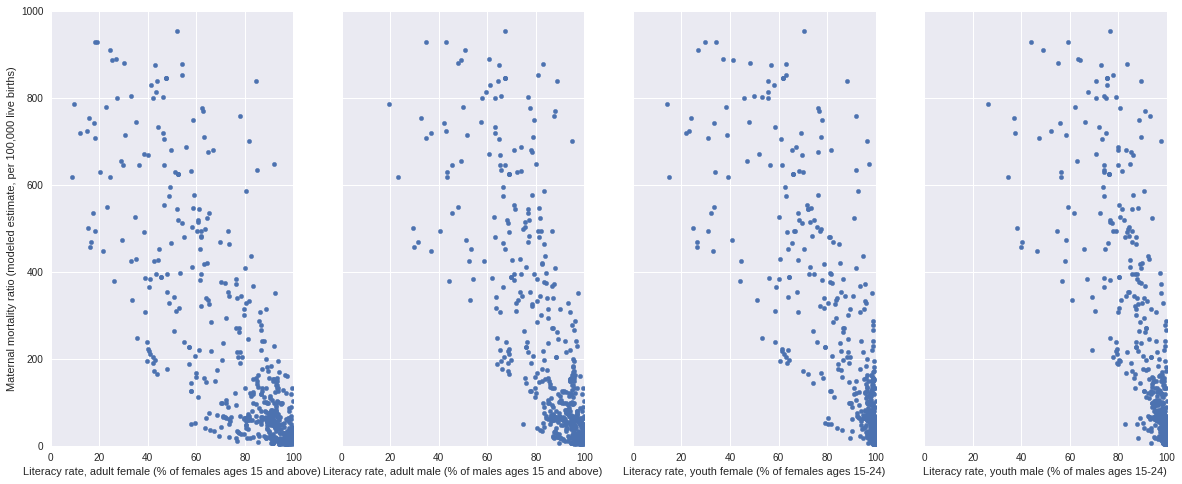

In [96]:
#maternal death vs literacy rate
death, axis = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='Literacy rate, adult female (% of females ages 15 and above)', y='Maternal mortality ratio (modeled estimate, per 100,000 live births)', ax=axis[0], figsize=(20, 8))
df.plot(kind='scatter', x='Literacy rate, adult male (% of males ages 15 and above)', y='Maternal mortality ratio (modeled estimate, per 100,000 live births)', ax=axis[1])
df.plot(kind='scatter', x='Literacy rate, youth female (% of females ages 15-24)', y='Maternal mortality ratio (modeled estimate, per 100,000 live births)', ax =axis[2])
df.plot(kind='scatter', x='Literacy rate, youth male (% of males ages 15-24)', y='Maternal mortality ratio (modeled estimate, per 100,000 live births)', ax=axis[3])
axis[0].set_xlim([0, 100])
axis[0].set_ylim([0, 1000])
axis[1].set_xlim([0, 100])
axis[1].set_ylim([0, 1000])
axis[2].set_xlim([0, 100])
axis[2].set_ylim([0, 1000])
axis[3].set_xlim([0, 100])
axis[3].set_ylim([0, 1000])

In [97]:
focus['litfemale'] = df['Literacy rate, adult female (% of females ages 15 and above)']
focus['litmale'] = df['Literacy rate, adult male (% of males ages 15 and above)']
focus['youthfemale'] = df['Literacy rate, youth female (% of females ages 15-24)']
focus['youthmale'] = df['Literacy rate, youth male (% of males ages 15-24)']

femlit = smf.ols(formula='litfemale ~ matdeath', data=focus).fit()
femlit.params

Intercept    91.282843
matdeath     -0.064724
dtype: float64

In [98]:
mlit = smf.ols(formula='litmale ~ matdeath', data=focus).fit()
mlit.params

Intercept    95.055042
matdeath     -0.043319
dtype: float64

In [99]:
yfemlit = smf.ols(formula='youthfemale ~ matdeath', data=focus).fit()
yfemlit.params

Intercept    99.075904
matdeath     -0.054528
dtype: float64

In [100]:
ymlit = smf.ols(formula='youthmale ~ matdeath', data=focus).fit()
ymlit.params

Intercept    98.751417
matdeath     -0.035708
dtype: float64

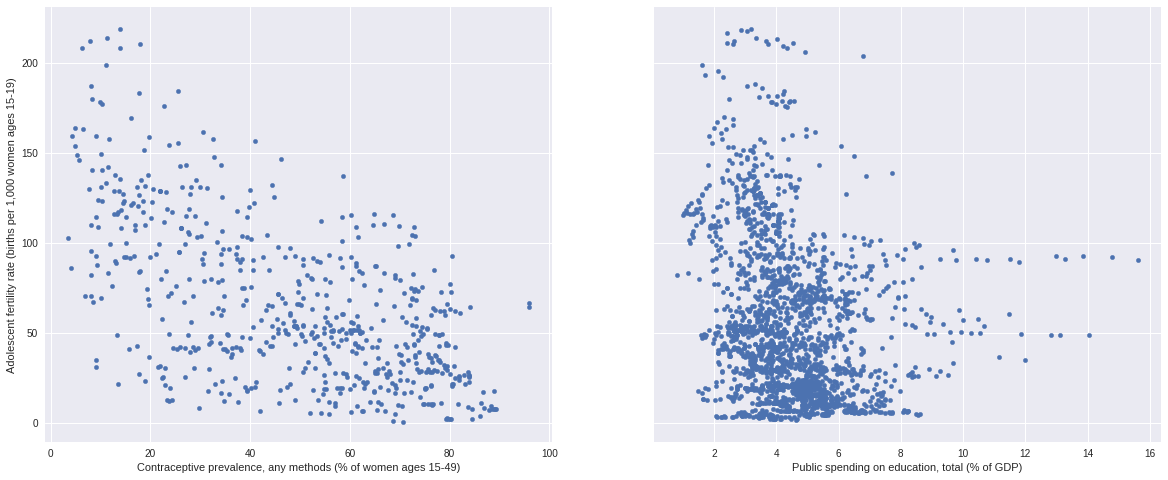

In [101]:
# Scatter plots of Adolescent Fertility vs Contraceptive use and Public Education Spending
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind='scatter', x='Contraceptive prevalence, any methods (% of women ages 15-49)', y='Adolescent fertility rate (births per 1,000 women ages 15-19)', ax=axs[0], figsize=(20, 8))
df.plot(kind='scatter', x='Public spending on education, total (% of GDP)', y='Adolescent fertility rate (births per 1,000 women ages 15-19)', ax=axs[1])

In [102]:
#Adolescent Fertility dependence on Contraceptive Prevalence
teenbc = smf.ols(formula='teen ~ bc', data=focus).fit()
teenbc.params

Intercept    120.507345
bc            -1.140946
dtype: float64

In [103]:
#Adolescent Fertility dependence on Public Education Spending
teenedu = smf.ols(formula='teen ~ eduspend', data=focus).fit()
teenedu.params

Intercept    82.554222
eduspend     -6.363880
dtype: float64

In [104]:
teenfert = smf.ols(formula='teen ~ bc + eduspend', data=focus)
line = teenfert.fit()
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   teen   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     144.2
Date:                Wed, 16 Aug 2017   Prob (F-statistic):           5.66e-47
Time:                        14:44:13   Log-Likelihood:                -1821.1
No. Observations:                 371   AIC:                             3648.
Df Residuals:                     368   BIC:                             3660.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    135.3550      5.194     26.060      0.000     125.142     145.568
bc            -1.2059      0.075    -16.101      0.000      -1.353      -1.059
eduspend      -2.1113      0.907     -2.327      0.020      -3.895      -0.327
==============================================================================
Omnibus:                        7.624   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.805
Skew:                           0.283   Prob(JB):                       0.0202
Kurtosis:                       3.429   Cond. No.                         171.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

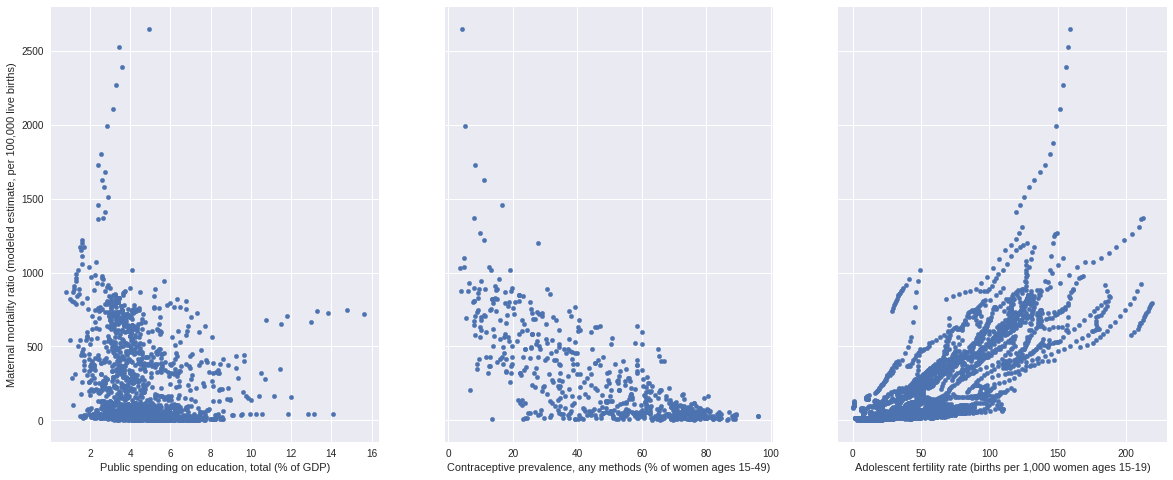

In [105]:
# visualize the relationship between Maternal Mortality vs Public Education Spending, Contraceptive use, and Adolescent Fertility using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Public spending on education, total (% of GDP)', y='Maternal mortality ratio (modeled estimate, per 100,000 live births)', ax=axs[0], figsize=(20, 8))
df.plot(kind='scatter', x='Contraceptive prevalence, any methods (% of women ages 15-49)', y='Maternal mortality ratio (modeled estimate, per 100,000 live births)', ax=axs[1])
df.plot(kind='scatter', x='Adolescent fertility rate (births per 1,000 women ages 15-19)', y='Maternal mortality ratio (modeled estimate, per 100,000 live births)', ax=axs[2])

In [106]:
# visualize the relationship between  using scatterplots
Ed_BC = df.plot(kind='scatter', x='Public spending on education, total (% of GDP)', y='Contraceptive prevalence, any methods (% of women ages 15-49)', ax=axs[2])
Ed_BC

In [107]:
'''corr = pd.DataFrame()
corr['country'] = df['Country.Name']
corr['life'] = df['Life expectancy at birth, total (years)']
corr['bc'] = df['Contraceptive prevalence, any methods (% of women ages 15-49)']
corr['teen'] = df['Adolescent fertility rate (births per 1,000 women ages 15-19)']
corr['matdeath'] = df['Maternal mortality ratio (modeled estimate, per 100,000 live births)']
corr['eduspend'] = df['Public spending on education, total (% of GDP)']
'''


"corr = pd.DataFrame()\ncorr['country'] = df['Country.Name']\ncorr['life'] = df['Life expectancy at birth, total (years)']\ncorr['bc'] = df['Contraceptive prevalence, any methods (% of women ages 15-49)']\ncorr['teen'] = df['Adolescent fertility rate (births per 1,000 women ages 15-19)']\ncorr['matdeath'] = df['Maternal mortality ratio (modeled estimate, per 100,000 live births)']\ncorr['eduspend'] = df['Public spending on education, total (% of GDP)']\n"